In [1]:
%pylab inline 
import networkx as nx
from numpy import *
from scipy.linalg import block_diag
from scipy import sparse
import matplotlib.colors as colors
import pylab
import sys
import string
import pandas as pd


import gudhi as gd


sys.path.append('../code')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from MMC_util import *
from MMC_plot_util import *
from NNO_util_minh import *

In [3]:
def draw_toy_graph(G,vmin,vmax,node_size,node_colors,edge_colors,edge_width,node_cmap,edge_cmap,s,ax,color_title=''):
   
    pos = nx.get_node_attributes(G,'pos')
    #vmin=0#min(edge_colors)
    #vmax=1#max(edge_colors)

    
    nodes_draw = nx.draw_networkx_nodes(G,
                       pos=pos, 
                       node_color = node_colors, 
                       node_size=node_size,
                       cmap=node_cmap,
                       vmin=vmin,
                       alpha=1,
                       vmax=vmax,
                       label=list(G.nodes()),
                       ax=ax)
    nodes_draw.set_edgecolor('k')

    edges_draw = nx.draw_networkx_edges(G,
                       pos=pos, 
                       edge_color=edge_colors,
                       edge_cmap=edge_cmap,
                       edge_vmin=vmin,
                       edge_vmax=vmax,
                       node_size=node_size,
                       ax=ax,
                       width=edge_width,
                       alpha=1,
                       arrows=True,
                       arrowsize=20)

    edge_labels = dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
    edgelabels_draw = nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    nodeslabels_draw = nx.draw_networkx_labels(G,pos)
    #fig1.tight_layout(nodes_draw)
    ax.axis('off')
    #ax.set_xlim([-1,1])
    #ax.set_ylim([-2,1])
    # make colorbar
    sm = plt.cm.ScalarMappable(cmap=s, norm=plt.Normalize(vmin = vmin, vmax=vmax))
    sm._A = []
    plt.colorbar(sm,label=color_title)
    
    return 

def get_pageRank_net_flow(A,alpha):
    p_rank = pagerank (A,alpha)
    P = google_matrix (A,alpha)
    F =  np.dot(np.diag(p_rank),P) # net flows over edges
    return F

def get_edge_colors(A,matrix):
        C = (np.array(np.where(A)))[0]
        D = (np.array(np.where(A)))[1]
        m = np.zeros(len(C))
        for t in range(len(C)):
            m[t] = matrix[C[t],D[t]]
    
        return m
    
def get_filtration_matrix(XX,max_value=.1,numsteps=8):
    
    #symmetrize input matrix
    m,n = shape(XX)
    XX = max_matrix(XX,m,n)
    
    #filtration_matrix = (XX==0)*np.max(XX)*10 + XX #make non-edges some huge number
    filtration_matrix = (XX==0)*max_value + XX #make non-edges some huge number
    filtration_matrix = filtration_matrix  - np.diag(np.diag(filtration_matrix))
    return filtration_matrix, np.linspace(0,np.max(XX),numsteps)



def get_weighted_filtration(G, # original graph
                            filtration_matrix,#matrix to filter 
                            filtration_steps):#steps for filtering

    labels = list(G.nodes())#node names
    
    GG = G
    filtration=[]
    for k,step in enumerate(filtration_steps):
        AA = np.array( filtration_matrix <= step,int)
        for i in range(len(AA)):
            AA[i,i] = 0
        A2 = pd.DataFrame(AA, index=labels, columns=labels)    
        GG = nx.to_networkx_graph(A2)
        #mapping = dict(zip(GG, string.ascii_lowercase))
        #GG = nx.relabel_nodes(G, mapping)  # nodes are characters a through z
        filtration.append(GG)
    return filtration

 
def make_wfiltration_fig(G,nets,titles,y_label):
    
    pos = nx.get_node_attributes(G,'pos')
    
    fig, ax = plt.subplots(1,len(nets),figsize=(16,3))
#    ax = axes.flatten()

    for i in range(len(nets)):
        nx.draw_networkx(nets[i], 
                         pos=pos,
                         ax=ax[i], 
                         node_size=800,
                         #font_size=19,
                         node_color='lightgray')  
        ax[i].set_title(titles[i])
        ax[i].set_xlim([-1,1])
        ax[i].set_ylim([-1.5,1])        
        ax[i].axis('off')
        if i==0:
             ax[i].set_ylabel(y_label)
#    plt.show()
    plt.tight_layout();
    #savefig('VR_filtration.pdf');
    return fig,ax



def get_filtration_matrix_3(XX,max_value=.1,numsteps=8):
    
    #symmetrize input matrix
    m,n = shape(XX)
    XX = max_matrix(XX,m,n)
    
    fil_matrix = max_value - XX
    fil_matrix = fil_matrix - np.diag(np.diag(fil_matrix))
    
#    return fil_matrix, max_value - np.linspace(0,max_value,numsteps)
    return fil_matrix, max_value - np.linspace(.003,max_value*.95,numsteps)


In [4]:
def draw_toy_graph2(G,vmin,vmax,node_size,node_colors,edge_colors,edge_width,node_cmap,edge_cmap,s,ax,color_title=''):
   
    pos = nx.get_node_attributes(G,'pos')
    #vmin=0#min(edge_colors)
    #vmax=1#max(edge_colors)

    
    nodes_draw = nx.draw_networkx_nodes(G,
                       pos=pos, 
                       node_color = node_colors, 
                       node_size=node_size,
                       cmap=node_cmap,
                       vmin=vmin,
                       alpha=1,
                       vmax=vmax,
                       label=list(G.nodes()),
                       ax=ax)
    nodes_draw.set_edgecolor('k')

    edges_draw = nx.draw_networkx_edges(G,
                       pos=pos, 
                       edge_color=edge_colors,
                       edge_cmap=edge_cmap,
                       edge_vmin=vmin,
                       edge_vmax=vmax,
                       node_size=node_size,
                       ax=ax,
                       width=edge_width,
                       alpha=1,
                       arrows=True,
                       arrowsize=20)

    edge_labels = dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
    #edgelabels_draw = nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,ax=ax)
    nodeslabels_draw = nx.draw_networkx_labels(G,pos,ax=ax)
    #fig1.tight_layout(nodes_draw)
    ax.axis('off')
    #ax.set_xlim([-1,1])
    #ax.set_ylim([-2,1])
    # make colorbar
    sm = plt.cm.ScalarMappable(cmap=s, norm=plt.Normalize(vmin = vmin, vmax=vmax))
    #sm._A = []
    #plt.colorbar(sm,label=color_title)
    
    return 


In [5]:
def get_1_cycles(diag): # return numpy array of 1-cycles from persistence diagram
    one_cycles = []
    for d in diag:
        if d[0]==1:
            one_cycles.append(([d[1][0],d[1][1]])  )
    return np.array(one_cycles).T


In [6]:
G = make_toy_graph()
A = np.array((nx.adjacency_matrix(G)).todense())
alphas = [.2,.4,.6,.8,1]#np.linspace(0.2,1,5)
p_ranks = np.zeros((len(alphas),len(A)))


In [7]:
node_size = 400
edge_width = 3


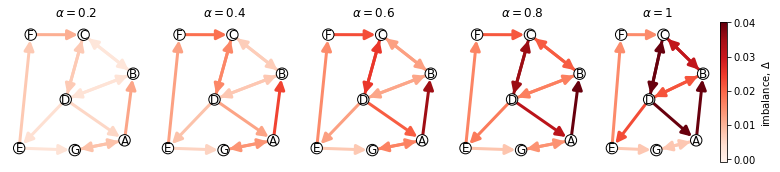

In [8]:
f1,ax = subplots(1,len(alphas),figsize=(11,2.5),sharex=True)


cycles = []

for i,alpha in enumerate(alphas):
    node_colors = .8*np.ones(len(list(G.nodes))) #list(np.random.rand(len(list(G.nodes()))))
    node_cmap = plt.cm.gray
    
    F = get_pageRank_net_flow(A,alphas[i])
    Delta = (F - F.T)/2
    m,n = shape(Delta)
    Delta_symmetric = max_matrix(Delta,m,n) # magnitude of imbalance for net flows 
    
    t = get_edge_colors(A,Delta_symmetric)
    edge_cmap = plt.cm.Reds
    s = edge_cmap
    edge_colors = t
    node_size = 130
    vmin = -.001
    vmax = .04
    max_value = .2
    filtration_matrix,filtration_steps =  get_filtration_matrix(Delta_symmetric,max_value=max_value)
    
    diag = dist2PD (filtration_matrix, max_dim=2, max_edge_length=max_value)[1]
    
    
    draw_toy_graph2(G,vmin,vmax,node_size,node_colors,edge_colors,edge_width,node_cmap,edge_cmap,s,ax[i])
    #print (filtration_steps)

    color_title = 'imbalance, $\Delta$'

    title_string = r'$\alpha='+str(alpha) + '$' 
    ax[i].set_title(title_string)


sm = plt.cm.ScalarMappable(cmap=s, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm,label=color_title)

plt.tight_layout()   
savefig('fig5.pdf')


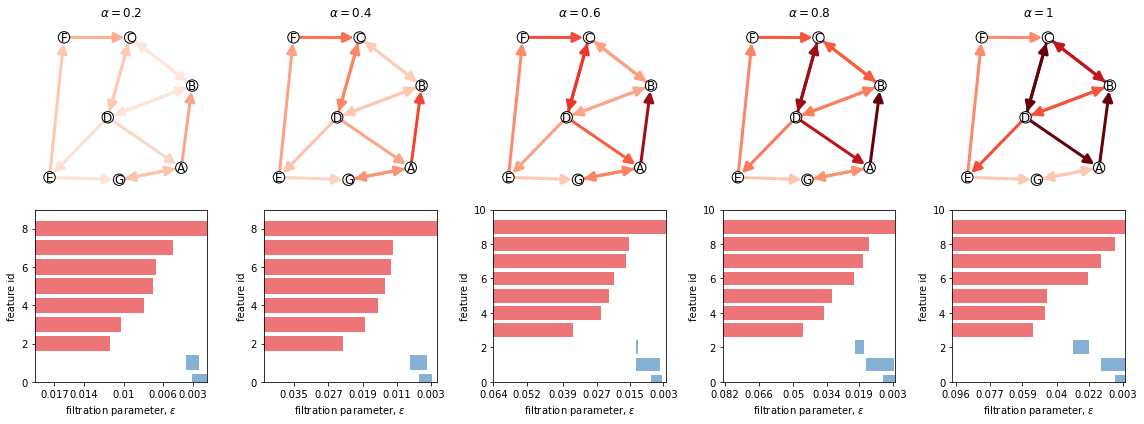

In [9]:
f1,ax = subplots(2,len(alphas),figsize=(16,6))


cycles = []

for i,alpha in enumerate(alphas):
    #F = get_pageRank_net_flow(A,alphas[i])
    #Delta = (F - F.T)/2
    #m,n = shape(Delta)
    #Delta_symmetric = max_matrix(Delta,m,n) # magnitude of imbalance for net flows 
    
    #filtration_matrix,filtration_steps =  get_filtration_matrix(Delta_symmetric,max_value=max_value)
    
    #diag = dist2PD (filtration_matrix, max_dim=2, max_edge_length=max_value)[1]
    
    
    
    #gd.plot_persistence_barcode (diag,axes=ax[1,i])
    #values = [ round(max_value-xx,4)  for xx in filtration_steps]

    #plt.xlim([-.02,max_value])
    #plt.xticks (filtration_steps,values)

    #plt.xlim([filtration_steps[1],0.05])
    #plt.xlim([-filtration_steps[1]/3,filtration_steps[-1]+-filtration_steps[1]/3])

    #ax[0,i].set_title('')
    ##ax[1,i].set_ylabel('feature id')
    #print (diag)
    #ax[1,i].set_xlabel('filtration parameter, $w$')
    

    node_colors = .8*np.ones(len(list(G.nodes))) #list(np.random.rand(len(list(G.nodes()))))
    node_cmap = plt.cm.gray
    
    F = get_pageRank_net_flow(A,alphas[i])
    Delta = (F - F.T)/2
    m,n = shape(Delta)
    Delta_symmetric = max_matrix(Delta,m,n) # magnitude of imbalance for net flows 
    
    t = get_edge_colors(A,Delta_symmetric)
    edge_cmap = plt.cm.Reds
    s = edge_cmap
    edge_colors = t
    node_size = 130
    vmin = -.001
    vmax = .04
#    max_value = .2
    max_value = np.max(Delta_symmetric)*1.9

#    filtration_matrix, filtration_steps =  get_filtration_matrix(Delta_symmetric,max_value=max_value)
    
    
    draw_toy_graph2(G,vmin,vmax,node_size,node_colors,edge_colors,edge_width,node_cmap,edge_cmap,s,ax[0,i])
    
    
    fil_matrix,fil_steps =  get_filtration_matrix_3(Delta_symmetric,max_value=max_value,numsteps=6)
    fil_steps = array([round(s,3) for s in fil_steps])
    
    filtration = get_weighted_filtration(G,fil_matrix,max_value - fil_steps)

    
    
    #diag = dist2PD (filtration_matrix, max_dim=2, max_edge_length=max_value)[1]
    diag = dist2PD (fil_matrix, max_dim=2, max_edge_length=.1)[1]
    
    
#    values = [ round(max_value-xx,2)  for xx in filtration_steps]
    #plt.xticks (filtration_steps,values)

    gd.plot_persistence_barcode (diag,axes=ax[1,i])

    #plt.xlim([-.02,max_value])
    #plt.xlim([filtration_steps[1],0.05])
    #plt.xlim([-filtration_steps[1]/3,filtration_steps[-1]+-filtration_steps[1]/3])

    ax[1,i].set_title('')
    ax[1,i].set_ylabel('feature id')
    ax[1,i].set_xlabel(r'filtration parameter, $\epsilon$')
#    ax[i].set_xticks(filtration_steps)

    values = [ round(max_value-xx,3)  for xx in fil_steps]

    #plt.xlim([-.000,max_value])
    ax[1,i].set_xticks (fil_steps)
    ax[1,i].set_xticklabels(values)
    #ax[1,i].xaxis.set_major_locator(plt.MaxNLocator(4))

    #print (filtration_steps)


    ax[1,i].set_xlim([.003,max_value-.002])

    title_string = r'$\alpha='+str(alpha) + '$' 
    ax[0,i].set_title(title_string)
    color_title = 'imbalance, $\Delta$'


plt.tight_layout()   
savefig('fig5n.pdf')


In [10]:
alphas2 = np.linspace(0.01,.99,200)

cycles = []
for i,alpha in enumerate(alphas2):
    F = get_pageRank_net_flow(A,alphas2[i])
    Delta = (F - F.T)/2
    m,n = shape(Delta)
    Delta_symmetric = max_matrix(Delta,m,n) # magnitude of imbalance for net flows 
    
    max_value = .2
    #max_value = np.max(Delta_symmetric)*1.1

    #filtration_matrix,filtration_steps =  get_filtration_matrix(Delta_symmetric,max_value=max_value)
    fil_matrix,_ =  get_filtration_matrix_3(Delta_symmetric,max_value=max_value,numsteps=6)
    
    diag = dist2PD (fil_matrix, max_dim=2, max_edge_length=max_value)[1]
    
    cycles.append(get_1_cycles(diag))

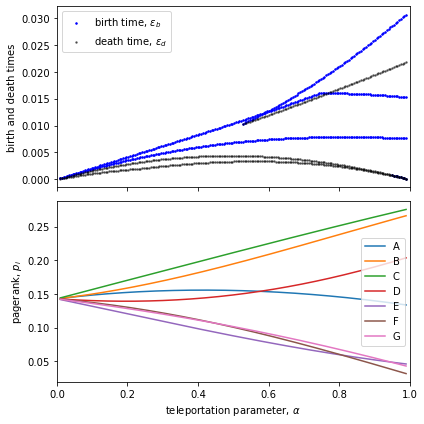

In [11]:
f1,ax = subplots(2,1,figsize=(6,6),sharex=True)

p_ranks = np.zeros((len(alphas2),len(A)))
for i,alpha in enumerate(alphas2):
    p_ranks[i] = pagerank (A,alpha)
    

for i,alpha in enumerate(alphas2):
    ax[0].scatter(alpha*ones(len(cycles[i][0,:])),max_value-cycles[i][0,:],c='b',s=9,marker='.')
    ax[0].scatter(alpha*ones(len(cycles[i][1,:])),max_value-cycles[i][1,:],c='k',s=9,marker='.',alpha=.5)
    
ax[1].set_ylabel(r'pagerank, $p_i$')
ax[0].set_ylabel(r'birth and death times')
ax[1].set_xlabel(r'teleportation parameter, $\alpha$');
ax[0].legend(['birth time, $\epsilon_{b}$','death time, $\epsilon_{d}$'])


ax[1].plot(alphas2,p_ranks);
ax[1].legend(list(G.nodes()))

ax[1].set_xlim([0,1])
#ax[1,i].set_xticklabels(apha2)

plt.tight_layout()

savefig('pagerank_persistence.pdf')